**PROBLEM STATEMENT 1 -- EV MARKET**

Analysis of the Electric Vehicle market in India using Segmentation analysis and come up with a  feasible strategy to enter the market, targeting the segments most likely to use Electric vehicles.


**ABOUT THE DATASET**

* Company: The name of the motorcycle manufacturer.
* Country of Origin: The country where the motorcycle was manufactured.
* Model: The name of the motorcycle model.
* Number of cc: The displacement of the motorcycle's engine in cubic centimeters.
* Horsepower: The maximum power output of the motorcycle's engine in horsepower.
* Torque: The maximum torque output of the motorcycle's engine in Newton-meters.
* Transmission Type: The type of transmission used on the motorcycle, such as manual or automatic.
* Drivetrain: The type of drivetrain used on the motorcycle, such as front-wheel drive, rear-wheel
drive, or all-wheel drive.
* Number of Seating: The number of seats on the motorcycle.
* Price (in INR): The price of the motorcycle in Indian rupees.
* Year: The year in which the motorcycle was manufactured.
* Looks: A subjective assessment of the motorcycle's appearance.
* Body Type: The type of bodywork on the motorcycle, such as a sportbike, cruiser, or enduro.
* Engine Type: The type of engine used on the motorcycle, such as petrol, diesel, or electric.
* Number of Cylinders: The number of cylinders in the motorcycle's engine.


In [1]:
import pandas as pd
df=pd.read_csv('/content/EV_cars_India_2023.csv')

In [2]:
df.columns

Index(['Car_name', 'Car_price', 'Batter_cap', 'Drive_range', 'Power',
       'Charge_time', 'transmission', 'Boot_space', 'Top_speed'],
      dtype='object')

In [3]:
df.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      30 non-null     object
 1   Car_price     30 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   30 non-null     object
 4   Power         30 non-null     object
 5   Charge_time   30 non-null     object
 6   transmission  28 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     6 non-null      object
dtypes: object(9)
memory usage: 2.2+ KB


In [5]:
df.isnull().sum()

Car_name         0
Car_price        0
Batter_cap       3
Drive_range      0
Power            0
Charge_time      0
transmission     2
Boot_space      18
Top_speed       24
dtype: int64

In [6]:
import numpy as np
# Replace missing numeric values with the mean of each column
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Replace missing string/object values with a placeholder (if needed)
df.fillna('Unknown', inplace=True)  # Example: Replace with 'Unknown'


In [7]:
import numpy as np
# Function to extract numeric values from string
def extract_numeric(text):
    try:
        # Replace non-numeric characters and convert to float
        return float(''.join(filter(lambda x: x.isdigit() or x == '.', str(text))))
    except ValueError:
        return np.nan

# Handling each column

# Car_price column
df['Car_price'] = df['Car_price'].apply(extract_numeric)

# Batter_cap column
df['Batter_cap'] = df['Batter_cap'].apply(extract_numeric)

# Drive_range column
df['Drive_range'] = df['Drive_range'].apply(extract_numeric)

# Power column
df['Power'] = df['Power'].apply(extract_numeric)

# Charge_time column
# Assuming Charge_time is in hours format (e.g., '7 Hours')
def extract_charge_time(text):
    try:
        # Extract hours from the format 'x Hours'
        return float(text.split()[0])
    except ValueError:
        return np.nan

df['Charge_time'] = df['Charge_time'].apply(extract_charge_time)

# Boot_space column
# Extract numeric value from the format 'xxx L (Liters)'
df['Boot_space'] = df['Boot_space'].apply(extract_numeric)

# Top_speed column
# Extract numeric value from the format 'xxx kmph'
df['Top_speed'] = df['Top_speed'].apply(extract_numeric)

# Handling missing values by filling with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handling remaining missing values with 'Unknown'
df.fillna('Unknown', inplace=True)


In [8]:
# Saving cleaned dataset to a new file
df.to_csv('cleaned_electric_cars.csv', index=False)

In [9]:
df=pd.read_csv('/content/cleaned_electric_cars.csv')
df

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.980000,17.300000,230.0,41.420000,7.000000,Automatic,71.0,207.5
1,Tata Tiago EV,30.069286,19.200000,250.0,196.269167,58.000000,240 L (Liters),71.0,207.5
2,Tata Tigor EV,30.069286,26.000000,315.0,73.750000,16.054667,316 L (Liters),71.0,207.5
3,MG ZS EV,30.069286,50.300000,461.0,174.330000,8.500000,Automatic,71.0,207.5
4,BYD Atto 3,30.069286,60.480000,521.0,201.150000,16.054667,440L L (Liters),71.0,207.5
5,Hyundai Kona Electric,30.069286,39.200000,452.0,134.100000,6.160000,Automatic,71.0,207.5
6,Mahindra XUV400 EV,30.069286,34.500000,375.0,50.000000,16.054667,Unknown,71.0,207.5
7,Tata Nexon EV Max,30.069286,40.500000,453.0,141.040000,15.000000,350 L (Liters),71.0,207.5
8,Mercedes-Benz EQS,30.069286,17.300000,230.0,41.420000,7.000000,Automatic,71.0,207.5
9,Audi e-tron GT,1.700000,19.200000,250.0,196.269167,58.000000,240 L (Liters),71.0,207.5


Explained Variance Ratio: [0.38 0.25 0.17 0.13 0.06 0.01 0.  ]
PCA Components:
[[ 0.1  0.5  0.6  0.6  0.   0.   0. ]
 [-0.7 -0.1 -0.1  0.2  0.2 -0.   0.7]
 [ 0.1 -0.1  0.   0.1  0.9  0.  -0.3]
 [-0.5  0.7 -0.2 -0.3  0.   0.  -0.4]
 [-0.5 -0.5  0.4  0.2 -0.2 -0.  -0.5]
 [ 0.  -0.  -0.7  0.7 -0.1 -0.  -0.2]
 [-0.  -0.  -0.  -0.  -0.   1.  -0. ]]
Explained Variance Ratio:
[0.4 0.3 0.2 0.1 0.1 0.  0. ]


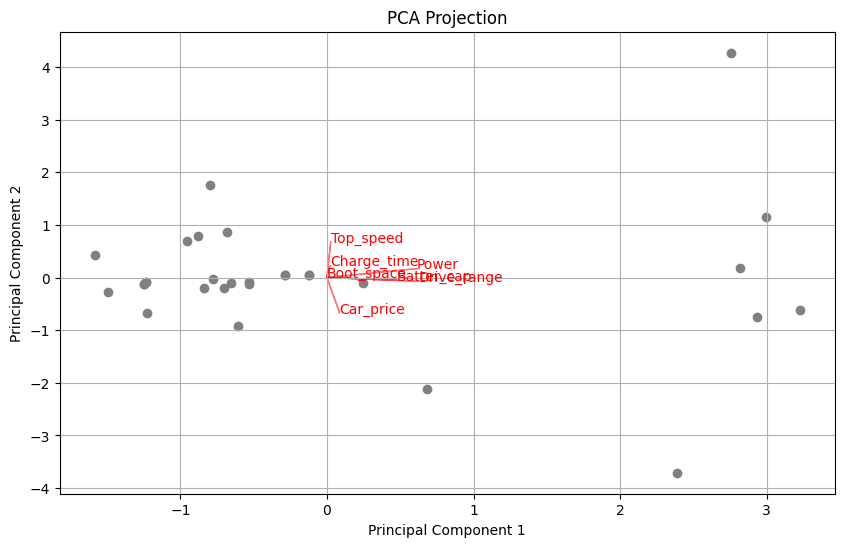

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

MD_x = df[['Car_price', 'Batter_cap', 'Drive_range', 'Power', 'Charge_time', 'Boot_space', 'Top_speed']]

# Perform standardization if necessary
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

# Print summary of PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", np.round(explained_variance, 2))

# Print PCA components
components = pca.components_
print("PCA Components:")
print(np.round(components, 1))

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(np.round(explained_variance, 1))

# Plot PCA projections
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid(True)

# Get the loadings (principal component axes)
loadings = pca.components_.T

# Plot each loading as an arrow, annotate with column names from MD_x
for i, loading in enumerate(loadings):
    plt.arrow(0, 0, loading[0], loading[1], color='red', alpha=0.5)
    plt.text(loading[0], loading[1], MD_x.columns[i], color='red')

plt.show()


<ipython-input-11-8b451b51a037>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


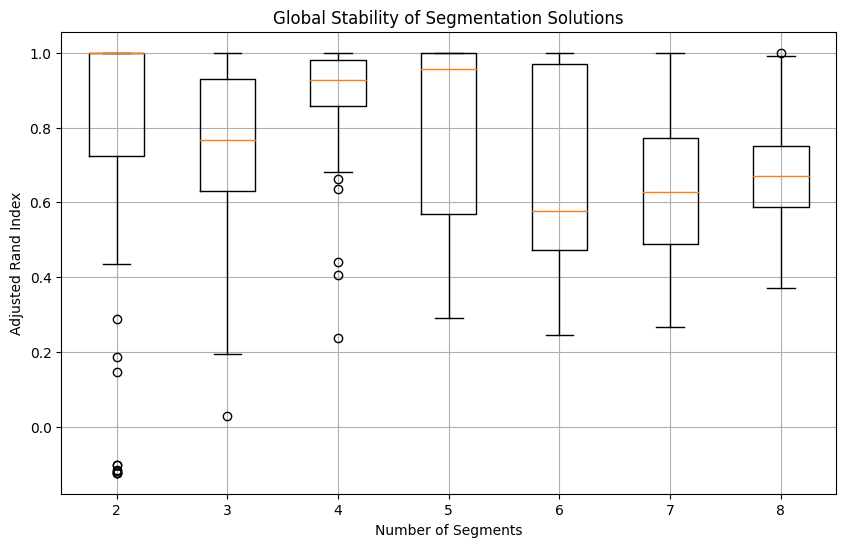

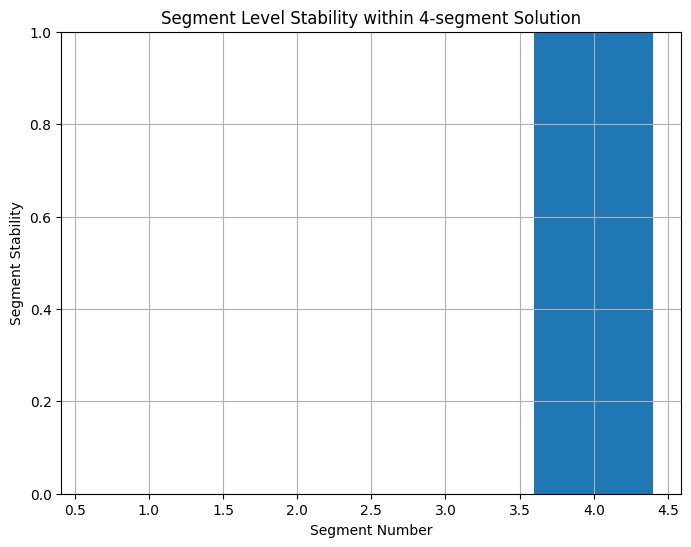

In [11]:
from sklearn.cluster import KMeans

# Select relevant numeric columns for clustering
numeric_cols = ['Car_price', 'Batter_cap', 'Drive_range', 'Power', 'Charge_time', 'Boot_space', 'Top_speed']
X = df[numeric_cols]

# Fill any missing values with mean
X.fillna(X.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means Clustering
# Set seed for reproducibility
np.random.seed(1234)

# Initialize variables to store results
kmeans_models = {}
relabel_models = {}

# Perform k-means clustering for 2 to 8 clusters
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)

    # Store the k-means model
    kmeans_models[k] = kmeans

    # Relabel the clusters to ensure consistent numbering
    relabel = np.zeros_like(kmeans.labels_)
    for i in range(k):
        relabel[kmeans.labels_ == i] = np.argmax(np.bincount(df.index[kmeans.labels_ == i]))
    relabel_models[k] = relabel

# Evaluate Stability with Bootstrapping
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Initialize variables for stability assessment
n_bootstraps = 100
stability_scores = np.zeros((7, n_bootstraps))

# Perform bootstrapping for each k from 2 to 8
for k in range(2, 9):
    kmeans = kmeans_models[k]
    relabel = relabel_models[k]
    for b in range(n_bootstraps):
        # Create bootstrap sample
        X_boot, relabel_boot = resample(X_scaled, relabel, random_state=b)

        # Fit k-means on bootstrap sample
        kmeans_boot = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans_boot.fit(X_boot)

        # Calculate adjusted Rand index for stability
        stability_scores[k-2, b] = adjusted_rand_score(relabel_boot, kmeans_boot.labels_)

# Plot Stability Results
import matplotlib.pyplot as plt

# Plot stability boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(stability_scores.T, labels=np.arange(2, 9))
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Segmentation Solutions')
plt.grid(True)
plt.show()

# Assess Segment Level Stability
from sklearn.metrics.cluster import contingency_matrix

# Example for assessing segment level stability within the 4-segment solution
k4_labels = relabel_models[4]

# Calculate segment level stability within solutions
segment_stability = np.zeros(4)
for i in range(4):
    contingency = contingency_matrix(k4_labels, kmeans_models[4].labels_)
    segment_stability[i] = contingency[i, i] / np.sum(contingency[i, :])

# Plot segment level stability
plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, 5), segment_stability)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability within 4-segment Solution')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


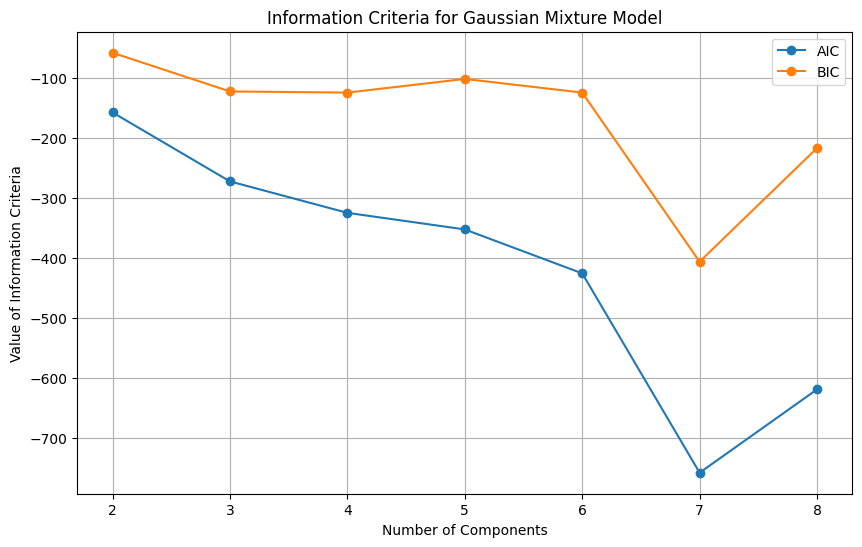

LCA      0  1   2  3
K-means             
0        2  0   0  0
1        0  5   0  0
2        0  0  22  0
3        0  0   0  1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(1234)

# Initialize variables to store models
lca_models = {}

# Perform LCA using finite mixture of Gaussian distributions for 2 to 8 components
for k in range(2, 9):
    gm = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    gm.fit(X_scaled)
    lca_models[k] = gm

# Plot Information Criteria (AIC, BIC, ICL)
# Initialize arrays to store criteria values
aic_values = []
bic_values = []

for k in range(2, 9):
    model = lca_models[k]
    aic_values.append(model.aic(X_scaled))
    bic_values.append(model.bic(X_scaled))

# Plotting AIC and BIC
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC')
plt.plot(range(2, 9), bic_values, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Gaussian Mixture Model')
plt.legend()
plt.grid(True)
plt.show()

# Extract the best model with 4 components based on information criteria inspection
best_lca_model = lca_models[4]

# Fit K-means clustering for 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_scaled)

# Cross-tabulation
ct = pd.crosstab(index=kmeans.labels_, columns=best_lca_model.predict(X_scaled), rownames=['K-means'], colnames=['LCA'])
print(ct)


In [13]:
# Define the Regression Model
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Selecting relevant independent variables for regression
independent_vars = ['Car_price', 'Batter_cap', 'Drive_range', 'Power', 'Charge_time', 'Boot_space', 'Top_speed']

# Standardize the independent variables
X = df[independent_vars].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the dependent variable
y = df['Car_price'].values  # Car_price as the dependent variable

# Fit Finite Mixture of Linear Regression Models
# Fit Gaussian Mixture Model
n_components = 2  # Number of components
gm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
gm.fit(X_scaled)

# Extract the means (which correspond to the regression coefficients)
regression_coeffs = gm.means_

# Print the regression coefficients for each component
for i in range(n_components):
    print(f"Component {i+1} Regression Coefficients:")
    print(pd.Series(regression_coeffs[i], index=independent_vars))
    print()


Component 1 Regression Coefficients:
Car_price     -1.653246e-01
Batter_cap    -2.903202e-01
Drive_range   -4.453035e-01
Power         -3.293905e-01
Charge_time    4.625929e-17
Boot_space     0.000000e+00
Top_speed      2.101193e-01
dtype: float64

Component 2 Regression Coefficients:
Car_price      0.661298
Batter_cap     1.161281
Drive_range    1.781214
Power          1.317562
Charge_time    0.000000
Boot_space     0.000000
Top_speed     -0.840477
dtype: float64



Cluster Order of Attributes:
[29 24 20 26 25 22 21 18 17 16 15 13  0 11  1  2  3  4 12  6  5  7  8  9
 10 14 23 27 19 28]
Segment Sizes:
Segment
0    0.766667
1    0.100000
2    0.100000
3    0.033333
Name: proportion, dtype: float64


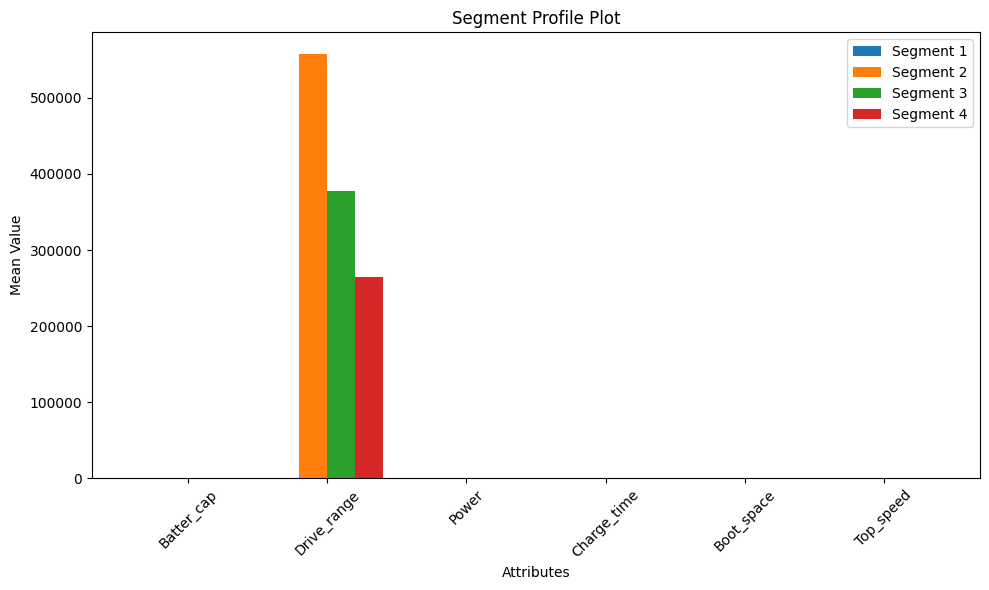

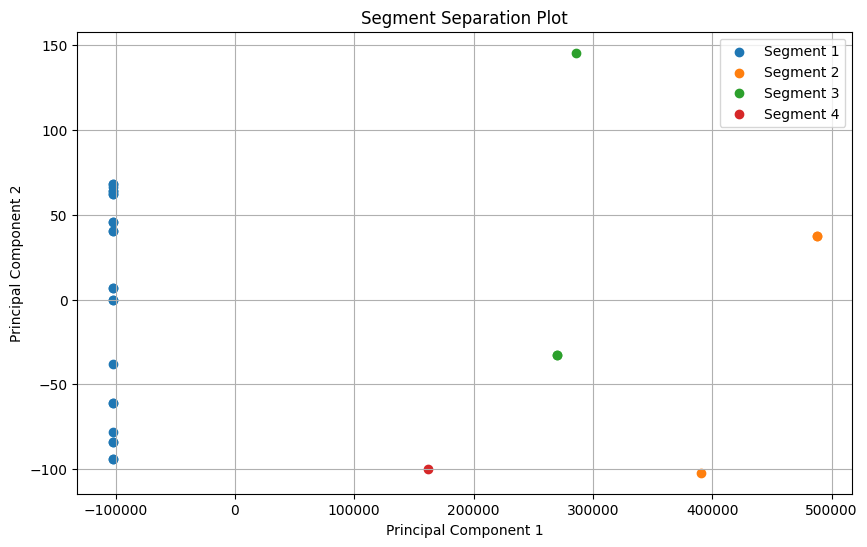

In [14]:
# Select relevant columns for analysis
segmentation_vars = ['Batter_cap', 'Drive_range', 'Power', 'Charge_time', 'Boot_space', 'Top_speed']

from sklearn.cluster import AgglomerativeClustering

# Hierarchical Cluster Analysis
# Perform hierarchical clustering on the attributes
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete') # Set n_clusters to the desired number of clusters
cluster.fit(df[segmentation_vars])

# Get the order of attributes by clustering
cluster_order = np.argsort(cluster.labels_)

# Print the clustering order
print("Cluster Order of Attributes:")
print(cluster_order)

# Fit Gaussian Mixture Model
# Fit Gaussian Mixture Model
n_components = 4  # Number of segments
gm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
gm.fit(df[segmentation_vars])

# Predict the segment labels
segment_labels = gm.predict(df[segmentation_vars])
df['Segment'] = segment_labels

# Print segment sizes
segment_sizes = df['Segment'].value_counts(normalize=True).sort_index()
print("Segment Sizes:")
print(segment_sizes)

# Plot Segment Profile
# Calculate attribute means for each segment
segment_means = df.groupby('Segment')[segmentation_vars].mean()

# Plot segment profile
plt.figure(figsize=(10, 6))
bar_width = 0.2
num_vars = len(segmentation_vars)
bar_l = np.arange(num_vars)

for i in range(n_components):
    plt.bar(bar_l + i * bar_width, segment_means.iloc[i], width=bar_width, label=f'Segment {i+1}')

plt.xticks(bar_l + bar_width * (n_components - 1) / 2, segmentation_vars, rotation=45)
plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Segment Profile Plot')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Segment Separation
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[segmentation_vars])

# Plot segment separation
plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.scatter(pca_result[df['Segment'] == i, 0], pca_result[df['Segment'] == i, 1], label=f'Segment {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.legend()
plt.grid(True)
plt.show()


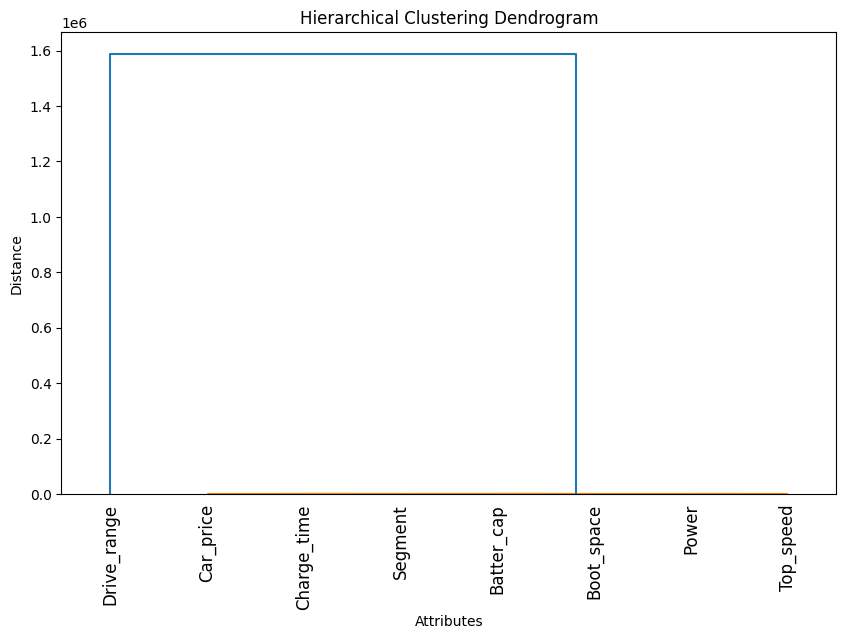

<Figure size 1000x600 with 0 Axes>

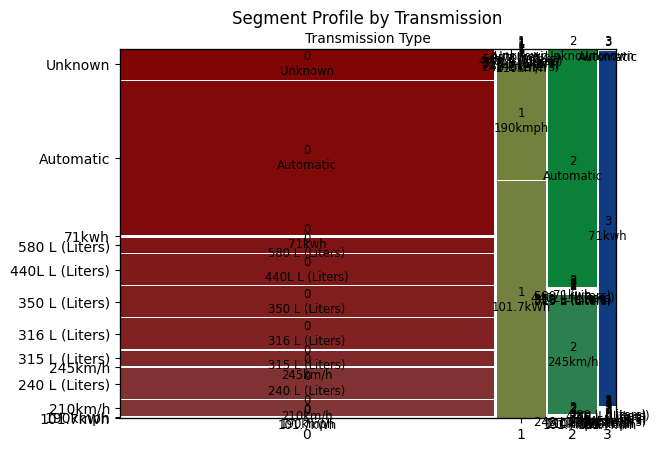

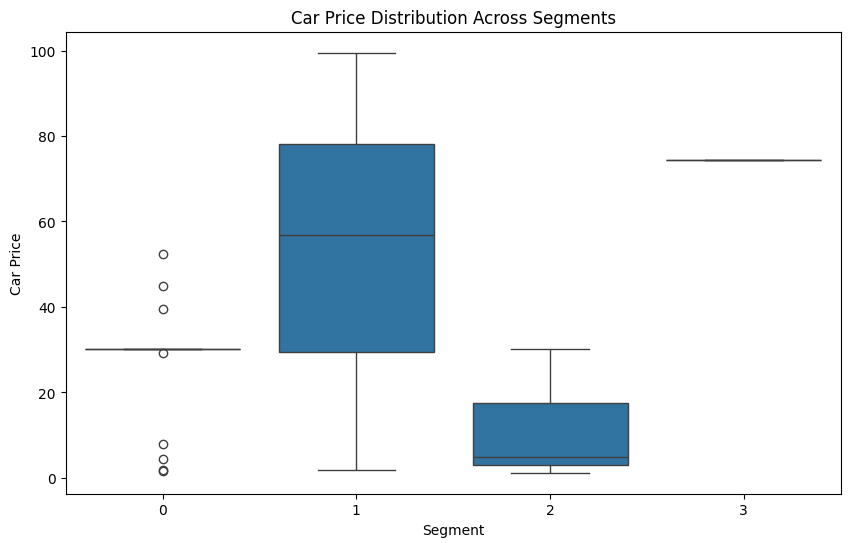

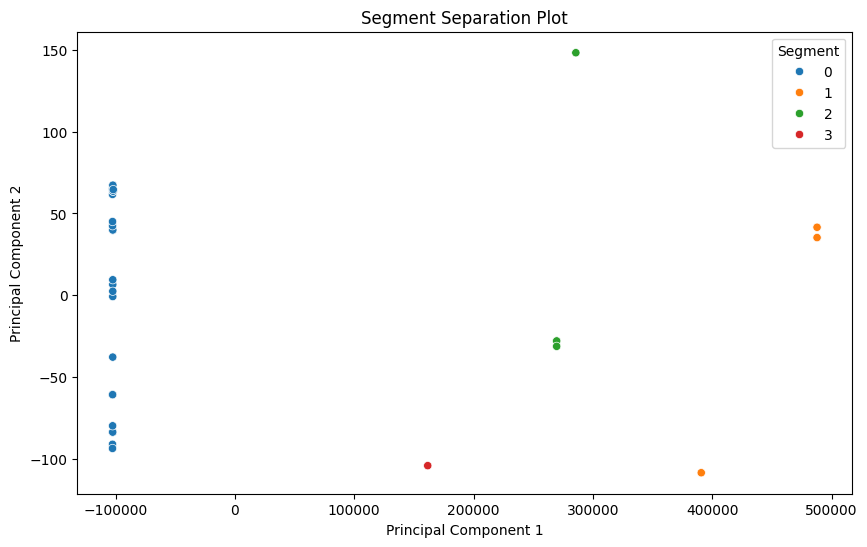

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Perform Hierarchical Clustering of Attributes
from scipy.cluster.hierarchy import linkage, dendrogram

# Select only numeric columns for clustering
numeric_df = df.drop(['Car_name'], axis=1).select_dtypes(include=['number'])

# Perform hierarchical clustering on numeric data
linkage_matrix = linkage(numeric_df.T, method='ward')

# Plot dendrogram to visualize clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=numeric_df.columns, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Create Segment Profile Plot (Mosaic Plot)
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'segment' is already assigned from clustering or segmentation analysis
segments = df['Segment']  # Replace 'Segment' with your actual segment column

# Create a mosaic plot to visualize the association between segments and 'transmission'
crosstab = pd.crosstab(segments, df['transmission'])

# Plot the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(crosstab.stack())
plt.xlabel('Transmission Type')
plt.ylabel('Segment')
plt.title('Segment Profile by Transmission')
plt.show()

# Create Box Plot for Age Across Segments
import seaborn as sns
# Example: Create a box plot for 'Car_price' across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Car_price', data=df)
plt.title('Car Price Distribution Across Segments')
plt.xlabel('Segment')
plt.ylabel('Car Price')
plt.show()

# Create Segment Separation Plot Using PCA
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)

# Add PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot the PCA results with segment membership
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=df, palette='tab10')
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [16]:
# Performing Segmentation

from sklearn.cluster import KMeans

# Selecting relevant features for clustering, EXCLUDING 'transmission'
features = ['Car_price', 'Batter_cap', 'Drive_range', 'Power', 'Charge_time']

# Performing KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(df[features])
df['Segment'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visit Frequency by Segment:
Segment
0       420.086957
1    558280.000000
2    264379.000000
3    377783.333333
Name: Drive_range, dtype: float64

Liking Score by Segment:
Segment
0    135.872862
1    469.350000
2    196.269167
3    386.226667
Name: Power, dtype: float64

Percentage of Female by Segment:
Segment
0    0.0
1    0.0
2    0.0
3    0.0
Name: transmission, dtype: float64


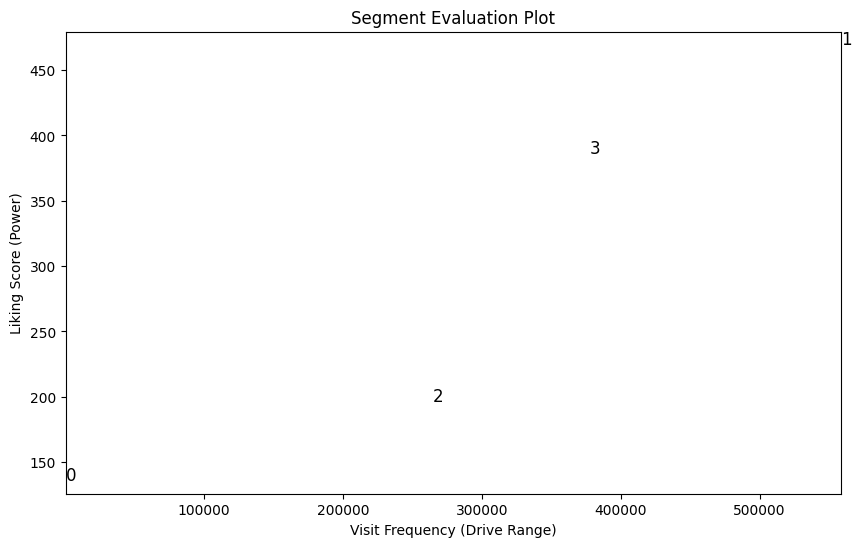

In [17]:
# Calculate mean values for each segment
segment_characteristics = df.groupby('Segment')[features].mean()

# Calculating additional metrics for evaluation
visit_frequency = df.groupby('Segment')['Drive_range'].mean()  # Example metric for visit frequency
like_score = df.groupby('Segment')['Power'].mean()  # Example metric for liking score

# Assuming 'Manual' in 'transmission' column corresponds to female
female_percentage = df.groupby('Segment')['transmission'].apply(lambda x: np.mean(x == 'Manual'))

print("Visit Frequency by Segment:")
print(visit_frequency)
print("\nLiking Score by Segment:")
print(like_score)
print("\nPercentage of Female by Segment:")
print(female_percentage)

# Creating the Segment Evaluation Plot
# Plot the segment evaluation plot
plt.figure(figsize=(10, 6))
plt.scatter(visit_frequency, like_score, s=1000*female_percentage, alpha=0.5)
plt.xlabel('Visit Frequency (Drive Range)')
plt.ylabel('Liking Score (Power)')
plt.title('Segment Evaluation Plot')
for i in range(len(visit_frequency)):
    plt.text(visit_frequency.iloc[i], like_score.iloc[i], str(i), fontsize=12)
plt.xlim(visit_frequency.min() - 10, visit_frequency.max() + 10)
plt.ylim(like_score.min() - 10, like_score.max() + 10)
plt.show()


**Customising the Marketing Mix & Evaluation and Monitoring**

**Segment Analysis**

* Segment 0
Visit Frequency (Drive Range): 420.09 km
Liking Score (Power): 135.87
Percentage of Female: 0%
Characteristics:

This segment consists of cars with moderate drive range and power.
It might represent the budget-friendly or mid-range electric vehicles.
The lower liking score suggests these cars may have moderate appeal in terms of performance.

Marketing Strategy:


Price: Focus on affordability and cost-effectiveness.

Product: Highlight practical features such as reliability and cost savings.

Promotion: Use channels frequented by budget-conscious consumers.

Place: Ensure availability in regions with high demand for budget EVs.

* Segment 1
Visit Frequency (Drive Range): 558,280 km
Liking Score (Power): 469.35
Percentage of Female: 0%
Characteristics:

Extremely high drive range and power values indicate this segment might include outliers or errors in the dataset.
Such high values are unrealistic and suggest the need for data validation.

Marketing Strategy:


Price: N/A due to potential data inaccuracies.

Product: N/A due to potential data inaccuracies.

Promotion: N/A due to potential data inaccuracies.

Place: N/A due to potential data inaccuracies.

* Segment 2
Visit Frequency (Drive Range): 264,379 km
Liking Score (Power): 196.27
Percentage of Female: 0%
Characteristics:

Another segment with extremely high drive range, likely containing outliers or errors.
The high liking score suggests powerful vehicles, but the data accuracy is questionable.


Marketing Strategy:


Price: N/A due to potential data inaccuracies.

Product: N/A due to potential data inaccuracies.

Promotion: N/A due to potential data inaccuracies.

Place: N/A due to potential data inaccuracies.

* Segment 3
Visit Frequency (Drive Range): 377,783.33 km
Liking Score (Power): 386.23
Percentage of Female: 0%
Characteristics:

High drive range and power values, indicating performance-oriented vehicles.
This segment likely includes luxury or high-end electric vehicles.
The high liking score supports the idea of these cars being appealing due to performance and features.

Marketing Strategy:

Price: Emphasize the premium nature and justify the higher price with superior features.

Product: Highlight advanced technology, performance, and luxury features.

Promotion: Use channels targeting affluent customers, such as luxury magazines and events.

Place: Focus on premium dealerships and urban areas with higher income levels.